In [1]:
#import necessary packages
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import re

In [2]:
#import necessary packages for further word processing
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2020)
import nltk

In [3]:
#read in csv saved from python on terminal; see sklearn.txt
TFIDF = pd.read_csv("TF-IDF_Avg_15k.csv")
TFIDF.head()

,Unnamed: 0,Word,Weight
0,0,00,0.003849
1,1,000,0.000511
2,2,0000,0.000113
3,3,0005,0.000006
4,4,001,0.000003


In [4]:
#bring highest avg values to top
TFIDF.sort_values(by=["Weight"],ascending=False)

,Unnamed: 0,Word,Weight
33499,33499,pt,4.688520e-02
39843,39843,tracing,3.205659e-02
27054,27054,left,2.870406e-02
35521,35521,right,2.613189e-02
12578,12578,______________________________________________...,2.491119e-02
...,...,...,...
38816,38816,tailoring,6.242894e-07
12874,12874,acenitobacter,6.242894e-07
37899,37899,stout,6.242894e-07
20024,20024,disengaged,6.242894e-07


In [5]:
TFIDF.sort_values(by=["Weight"],ascending=False).head(50)

,Unnamed: 0,Word,Weight
33499,33499,pt,0.046885
39843,39843,tracing,0.032057
27054,27054,left,0.028704
35521,35521,right,0.026132
12578,12578,______________________________________________...,0.024911
34187,34187,reason,0.024313
17362,17362,clip,0.024313
17027,17027,chest,0.024209
33027,33027,previous,0.022492
36862,36862,sinus,0.022436


In [6]:
#cut any words that dont have a value above 0.0005
TFIDF= TFIDF[['Word', 'Weight']]
Top_tfidf = TFIDF[TFIDF['Weight'] > 0.0005]  
Top_tfidf.sort_values(by=["Weight"],ascending=False).head(50)

,Word,Weight
33499,pt,0.046885
39843,tracing,0.032057
27054,left,0.028704
35521,right,0.026132
12578,______________________________________________...,0.024911
34187,reason,0.024313
17362,clip,0.024313
17027,chest,0.024209
33027,previous,0.022492
36862,sinus,0.022436


In [7]:
#Initial total word count
TFIDF.count()

Word      42336
Weight    42336
dtype: int64

In [8]:
#after only keeping words with weight > 0.0005
Top_tfidf.count()

Word      2977
Weight    2977
dtype: int64

In [9]:
Second_Top = TFIDF[TFIDF['Weight'] > 0.00005]
Second_Top.count()

Word      10293
Weight    10293
dtype: int64

([], <a list of 0 Text yticklabel objects>)

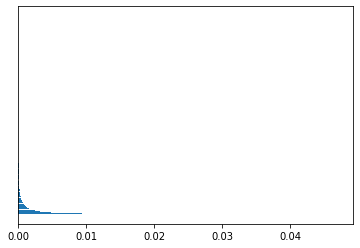

In [10]:
#plotting all of the words
X = TFIDF.sort_values(by=["Weight"],ascending=False)
plt.barh(X['Word'], X['Weight'])
plt.yticks([])

([], <a list of 0 Text yticklabel objects>)

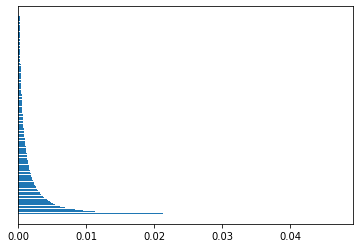

In [13]:
#plotting top 5000 words 
X = TFIDF.sort_values(by=["Weight"],ascending=False).head(5000)
plt.barh(X['Word'], X['Weight'])
plt.yticks([])

In [12]:
#what are the lowest weights?
TFIDF.sort_values(by=["Weight"],ascending=True).head(10)

,Word,Weight
19868,dimpling,6.242894e-07
12667,abds,6.242894e-07
33619,purchase,6.242894e-07
37899,stout,6.242894e-07
3602,21494,6.242894e-07
41257,vertberal,6.242894e-07
38128,sublaminar,6.242894e-07
38152,subperiosteal,6.242894e-07
12874,acenitobacter,6.242894e-07
23622,grasped,6.242894e-07


In [15]:
#read in csv saved from python on terminal; full text documents
TFIDF_Full = pd.read_csv("full_tfidf_weights.csv")
TFIDF_Full.head()

,Unnamed: 0,Word,Weight
0,0,00,5.508785e-03
1,1,000,7.140435e-04
2,2,0000,1.400949e-04
3,3,0000am,2.744283e-06
4,4,0000d,6.771744e-07


In [16]:
TFIDF_Full.sort_values(by=["Weight"],ascending=True).head(10)

,Unnamed: 0,Word,Weight
31835,31835,29yf,2.497040e-08
202999,202999,regure,2.497040e-08
19866,19866,18847,2.497040e-08
106265,106265,argonbeam,2.497040e-08
76071,76071,7656,2.497040e-08
19865,19865,18846,2.497040e-08
61373,61373,60221,2.742123e-08
117425,117425,cd71,2.742123e-08
176488,176488,mucocitis,2.742123e-08
88236,88236,8q22,2.742123e-08


In [17]:
#Remove any weights below 
TFIDF_Full = TFIDF_Full[['Word', 'Weight']]
Top_tfidf_Full = TFIDF_Full[TFIDF_Full['Weight'] > 0.000005]  
Top_tfidf_Full .sort_values(by=["Weight"],ascending=False).head(50)

,Word,Weight
198129,pt,0.044210
226350,tracing,0.030810
167057,left,0.027236
96953,______________________________________________...,0.025336
207258,right,0.024798
201224,reason,0.024719
120520,clip,0.023946
118742,chest,0.022986
174963,ml,0.022380
195740,previous,0.020349
